In [1]:
import numpy as np

In [2]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

Question 1) Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form θ1x+θ0) for any given values of (θ1,θ0)

In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
torch.manual_seed(45)

Convert to Tensors(as torch works on tensors)

In [5]:
x_tensor = torch.tensor(x1,dtype = torch.float32)
y_tensor = torch.tensor(y,dtype = torch.float32)

Initialise θ0 and θ1

In [6]:
theta_0 = torch.tensor(0.0,requires_grad = True)
theta_1 = torch.tensor(1.0,requires_grad = True)

Define Linear Regression model

In [7]:
def linear_model(x,theta_0,theta_1):
    return theta_1*x+theta_0

Compute the predictions

In [8]:
y_pred = linear_model(x_tensor,theta_0,theta_1)

Compute mean loss

In [9]:
loss = torch.mean((y_pred-y_tensor)**2)

Compute the gradient 

In [10]:
loss.backward()

Collect and print the values

In [11]:
grad_theta_0 = theta_0.grad
grad_theta_1 = theta_1.grad

print("Gradient w.r.t. θ0:",grad_theta_0.item())
print("Gradient w.r.t. θ1:",grad_theta_1.item())

Gradient w.r.t. θ0: -7.616434574127197
Gradient w.r.t. θ1: -0.39361658692359924


Question 2) Using the same (θ0,θ1) as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.

Initialise θ0 and θ1

In [12]:
theta_0 = torch.tensor(0.0,requires_grad = True)
theta_1 = torch.tensor(1.0,requires_grad = True)

True gradient

In [13]:
def true_gradient(x_tensor, y_tensor, theta_0, theta_1):
    # Zero out previous gradients before backpropagation
    if theta_0.grad is not None:
        theta_0.grad.zero_()
    if theta_1.grad is not None:
        theta_1.grad.zero_()

    # Forward pass (assuming x_tensor is 1D)
    y_pred = theta_0 + theta_1 * x_tensor  # No need for indexing like x_tensor[:, 1]
    
    # Compute the loss
    loss = torch.mean((y_pred - y_tensor) ** 2)
    
    # Backward pass (compute gradients)
    loss.backward()

    # Return gradients
    return theta_0.grad.item(), theta_1.grad.item()

true_grad_0, true_grad_1 = true_gradient(x_tensor, y_tensor, theta_0, theta_1)

print("True Gradient w.r.t. θ0:", true_grad_0)
print("True Gradient w.r.t. θ1:", true_grad_1)

theta_0.grad.zero_()
theta_1.grad.zero_()

True Gradient w.r.t. θ0: -7.616434574127197
True Gradient w.r.t. θ1: -0.39361658692359924


tensor(0.)

Stochastic Gradient

In [14]:
def stochastic_gradient(xi, yi, theta_0, theta_1):
    # Convert xi from tensor to float if it's a scalar
    xi_value = xi.item() if xi.dim() == 0 else xi[1].item()
    
    y_pred = theta_0 + theta_1 * xi_value
    loss = (y_pred - yi) ** 2
    loss.backward()
    return theta_0.grad.item(), theta_1.grad.item()

stochastic_grads_0 = []
stochastic_grads_1 = []

for i in range(num_samples):
    xi = x_tensor[i]
    yi = y_tensor[i]
    
    # Convert xi to a proper format if necessary
    if xi.dim() == 0:
        xi_value = xi.item()
        xi = torch.tensor([1.0, xi_value])  # Example to convert to a vector if needed
    elif xi.shape[0] < 2:
        raise ValueError(f"xi at index {i} should be a vector with at least 2 elements.")
    
    grad_0, grad_1 = stochastic_gradient(xi, yi, theta_0, theta_1)
    stochastic_grads_0.append(grad_0)
    stochastic_grads_1.append(grad_1)
    theta_0.grad.zero_()  # Reset gradients for next iteration
    theta_1.grad.zero_()

# Calculate the average stochastic gradient
avg_stochastic_grad_0 = sum(stochastic_grads_0) / num_samples
avg_stochastic_grad_1 = sum(stochastic_grads_1) / num_samples
print("Average Stochastic Gradient w.r.t. θ0:", avg_stochastic_grad_0)
print("Average Stochastic Gradient w.r.t. θ1:", avg_stochastic_grad_1)


Average Stochastic Gradient w.r.t. θ0: -7.616434812545776
Average Stochastic Gradient w.r.t. θ1: -0.3936165809631348


Question 3) Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ(or ϵ-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose ϵ=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.

In [15]:
import numpy as np
# Add a column of ones to x1 for the intercept term
X = np.vstack([np.ones(num_samples), x1]).T  # Shape (40, 2)

# Compute the optimal theta using the Normal Equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Predict the values
y_pred = X @ theta

# Compute the total loss (Sum of Squared Errors)
total_loss = np.sum((y - y_pred) ** 2)/len(y)

print("Optimal theta (θ):", theta)
print("Total loss (Sum of Squared Errors):", total_loss)

loss_by_optimal = total_loss


Optimal theta (θ): [3.9507064  2.68246893]
Total loss (Sum of Squared Errors): 0.5957541565733318


General model , loss and gradient

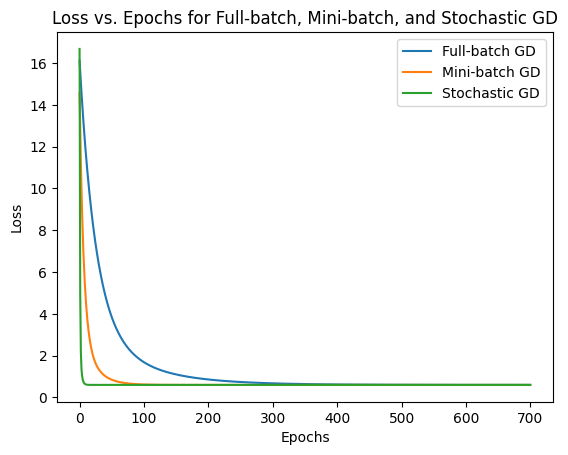

Full-batch GD convergence epoch: 654.0
Full-batch GD iterations in converged epoch: 654.0
Mini-batch GD convergence epoch: 164.0
Mini-batch GD iterations in converged epoch: 655.0
Stochastic GD convergence epoch: 15.0
Stochastic GD iterations in converged epoch: 595.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model function
def model(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

# Define the loss function
def loss_function(theta_0, theta_1, X, Y):
    predictions = model(theta_0, theta_1, X)
    return np.mean((Y - predictions) ** 2)  # Mean Squared Error (MSE)

# Define gradient calculation
def gradients(theta_0, theta_1, X, Y):
    predictions = model(theta_0, theta_1, X)
    error = Y - predictions
    grad_0 = -2 * np.mean(error)
    grad_1 = -2 * np.mean(error * X)
    return grad_0, grad_1

# Full-batch Gradient Descent
def full_batch_gd(X, Y, learning_rate, epochs, epsilon, fb, fb_iter):
    theta_0, theta_1 = 0.0, 0.0  # Initialize parameters
    losses = []
    converged_epoch = None
    converged_iter = None
    for epoch in range(epochs):
        grad_theta_0, grad_theta_1 = gradients(theta_0, theta_1, X, Y)
        theta_0 -= learning_rate * grad_theta_0  # Update parameters
        theta_1 -= learning_rate * grad_theta_1
        
        avg_loss = loss_function(theta_0, theta_1, X, Y)
        losses.append(avg_loss)
        
        # Check for convergence
        if converged_epoch is None and (avg_loss - loss_by_optimal) < epsilon:
            converged_epoch = epoch+1
            converged_iter = len(losses)  # Number of iterations in this epoch
        # Continue until the end of epochs
    fb.append(converged_epoch)
    fb_iter.append(converged_iter)
    return theta_0, theta_1, losses

# Mini-batch Gradient Descent
def mini_batch_gd(X, Y, learning_rate, epochs, batch_size, epsilon, mb, mb_iter):
    theta_0, theta_1 = 0.0, 0.0
    losses_f = []
    converged_epoch = None
    converged_iter = None
    for epoch in range(epochs):
        iterations = 0
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i + batch_size]
            Y_batch = Y[i:i + batch_size]
            grad_theta_0, grad_theta_1 = gradients(theta_0, theta_1, X_batch, Y_batch)
            theta_0 -= learning_rate * grad_theta_0
            theta_1 -= learning_rate * grad_theta_1
            
            avg_loss = loss_function(theta_0, theta_1, X, Y)
            iterations += 1
            
            
            # Check for convergence
            if converged_epoch is None and (avg_loss - loss_by_optimal) < epsilon:
                converged_epoch = epoch+1
                converged_iter = iterations  # Number of iterations in this epoch
        avg_loss = loss_function(theta_0, theta_1, X, Y)
        losses_f.append(avg_loss)
    mb.append(converged_epoch)
    mb_iter.append((converged_epoch-1)*(len(X)/batch_size) + converged_iter)
    return theta_0, theta_1, losses_f

# Stochastic Gradient Descent
def stochastic_gd(X, Y, learning_rate, epochs, epsilon, sgd, sgd_iter):
    theta_0, theta_1 = 0.0, 0.0
    losses_f = []
    converged_epoch = None
    converged_iter = None
    avg_loss = loss_function(theta_0, theta_1, X, Y)
    losses_f.append(avg_loss)
    for epoch in range(epochs):
        iterations = 0
        for x, y in zip(X, Y):
            grad_theta_0, grad_theta_1 = gradients(theta_0, theta_1, x, y)
            theta_0 -= learning_rate * grad_theta_0
            theta_1 -= learning_rate * grad_theta_1
            
            avg_loss = loss_function(theta_0, theta_1, X, Y)
            iterations += 1
            
            # Check for convergence
            if converged_epoch is None and (avg_loss - loss_by_optimal) < epsilon:
                converged_epoch = epoch+1
                converged_iter = iterations  # Number of iterations in this epoch
        avg_loss = loss_function(theta_0, theta_1, X, Y)
        losses_f.append(avg_loss)
    sgd.append(converged_epoch)
    sgd_iter.append((converged_epoch-1)*len(X) + converged_iter)
    return theta_0, theta_1, losses_f

# Parameters
learning_rate = 0.01
epochs = 700
epsilon = 0.001
batch_size = 10

# Initialize lists to keep track of convergence
fb = []
mb = []
sgd = []
fb_iter = []
mb_iter = []
sgd_iter = []


# Apply gradient descent methods
theta_fb_0, theta_fb_1, losses_fb = full_batch_gd(x1, y, learning_rate, epochs, epsilon, fb, fb_iter)
theta_mb_0, theta_mb_1, losses_mb = mini_batch_gd(x1, y, learning_rate, epochs, batch_size, epsilon, mb, mb_iter)
theta_sgd_0, theta_sgd_1, losses_sgd = stochastic_gd(x1, y, learning_rate, epochs, epsilon, sgd, sgd_iter)

# Plot losses vs. epochs
plt.plot(losses_fb, label='Full-batch GD')
plt.plot(losses_mb, label='Mini-batch GD')
plt.plot(losses_sgd, label='Stochastic GD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs for Full-batch, Mini-batch, and Stochastic GD')
plt.show()

def Average(lst): 
    return sum(lst) / len(lst) 

# Print the number of iterations
print(f"Full-batch GD convergence epoch: {Average(fb)}")
print(f"Full-batch GD iterations in converged epoch: {Average(fb_iter)}")
print(f"Mini-batch GD convergence epoch: {Average(mb)}")
print(f"Mini-batch GD iterations in converged epoch: {Average(mb_iter)}")
print(f"Stochastic GD convergence epoch: {Average(sgd)}")
print(f"Stochastic GD iterations in converged epoch: {Average(sgd_iter)}")


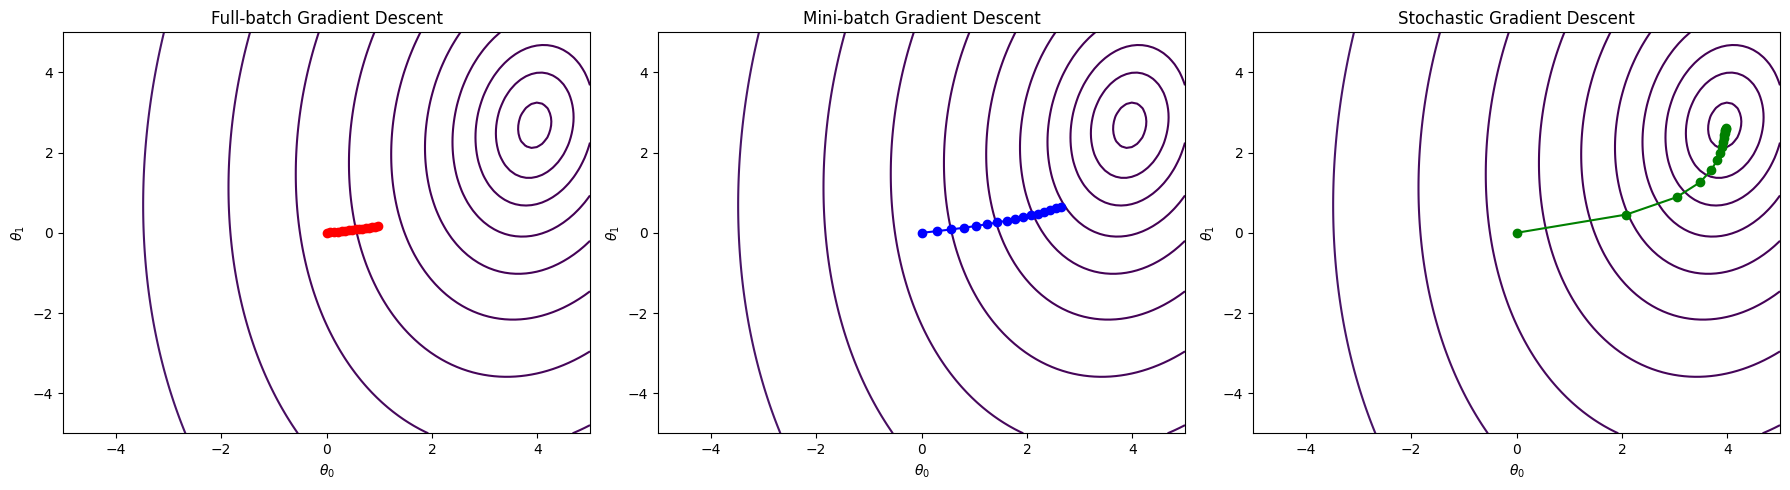

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model function
def model(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

# Define the loss function
def loss_function(theta_0, theta_1, X, Y):
    predictions = model(theta_0, theta_1, X)
    return np.mean((Y - predictions) ** 2)  # Mean Squared Error (MSE)

# Loss surface generation
theta_0_vals = np.linspace(-5, 5, 100)
theta_1_vals = np.linspace(-5, 5, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_vals, theta_1_vals)

def loss_surface(theta_0, theta_1, X, Y):
    loss = np.zeros_like(Theta_0)
    for i in range(Theta_0.shape[0]):
        for j in range(Theta_0.shape[1]):
            total_loss = 0
            for x, y in zip(X, Y):
                total_loss += loss_function(Theta_0[i, j], Theta_1[i, j], np.array([x]), np.array([y]))
            loss[i, j] = total_loss / len(X)  # Average loss for each pair (theta_0, theta_1)
    return loss


# Compute the loss surface
Z = loss_surface(Theta_0, Theta_1, x1, y)

# Define gradient descent functions
def full_batch_gd(X, Y, learning_rate, epochs, epsilon, fb, fb_iter):
    theta_0, theta_1 = 0.0, 0.0  # Initialize parameters
    losses = []
    converged_epoch = None
    converged_iter = None
    for epoch in range(epochs):
        grad_theta_0, grad_theta_1 = gradients(theta_0, theta_1, X, Y)
        theta_0 -= learning_rate * grad_theta_0  # Update parameters
        theta_1 -= learning_rate * grad_theta_1
        
        avg_loss = loss_function(theta_0, theta_1, X, Y)
        losses.append(avg_loss)
        
        if converged_epoch is None and (avg_loss - loss_by_optimal) < epsilon:
            converged_epoch = epoch
            converged_iter = len(losses)
    if converged_epoch is not None:
        fb.append(converged_epoch)
        fb_iter.append(converged_iter)
    return theta_0, theta_1, losses

def mini_batch_gd(X, Y, learning_rate, epochs, batch_size, epsilon, mb, mb_iter):
    theta_0, theta_1 = 0.0, 0.0
    losses_f = []
    converged_epoch = None
    converged_iter = None
    for epoch in range(epochs):
        iterations = 0
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i + batch_size]
            Y_batch = Y[i:i + batch_size]
            grad_theta_0, grad_theta_1 = gradients(theta_0, theta_1, X_batch, Y_batch)
            theta_0 -= learning_rate * grad_theta_0
            theta_1 -= learning_rate * grad_theta_1
            
            avg_loss = loss_function(theta_0, theta_1, X, Y)
            iterations += 1
            losses_f.append(avg_loss)
            
            if converged_epoch is None and (avg_loss - loss_by_optimal) < epsilon:
                converged_epoch = epoch
                converged_iter = iterations
    if converged_epoch is not None:
        mb.append(converged_epoch)
        mb_iter.append(converged_iter)
    return theta_0, theta_1, losses_f

def stochastic_gd(X, Y, learning_rate, epochs, epsilon, sgd, sgd_iter):
    theta_0, theta_1 = 0.0, 0.0
    losses_f = []
    converged_epoch = None
    converged_iter = None
    for epoch in range(epochs):
        iterations = 0
        for x, y in zip(X, Y):
            grad_theta_0, grad_theta_1 = gradients(theta_0, theta_1, x, y)
            theta_0 -= learning_rate * grad_theta_0
            theta_1 -= learning_rate * grad_theta_1
            
            avg_loss = loss_function(theta_0, theta_1, X, Y)
            iterations += 1
            losses_f.append(avg_loss)
            
            if converged_epoch is None and (avg_loss - loss_by_optimal) < epsilon:
                converged_epoch = epoch
                converged_iter = iterations
    if converged_epoch is not None:
        sgd.append(converged_epoch)
        sgd_iter.append(converged_iter)
    return theta_0, theta_1, losses_f

# Parameters
learning_rate = 0.01
epochs = 15
epsilon = 0.001
batch_size = 10

# Initialize lists to keep track of convergence
fb = []
mb = []
sgd = []
fb_iter = []
mb_iter = []
sgd_iter = []

# Apply gradient descent methods and store theta updates
theta_fb_0_vals = [0.0]
theta_fb_1_vals = [0.0]

theta_mb_0_vals = [0.0]
theta_mb_1_vals = [0.0]

theta_sgd_0_vals = [0.0]
theta_sgd_1_vals = [0.0]

# For Full-batch Gradient Descent
for epoch in range(epochs):
    theta_fb_0, theta_fb_1, _ = full_batch_gd(x1, y, learning_rate, epoch + 1, epsilon, fb, fb_iter)
    theta_fb_0_vals.append(theta_fb_0)
    theta_fb_1_vals.append(theta_fb_1)

# For Mini-batch Gradient Descent
for epoch in range(epochs):
    theta_mb_0, theta_mb_1, _ = mini_batch_gd(x1, y, learning_rate, epoch + 1, batch_size, epsilon, mb, mb_iter)
    theta_mb_0_vals.append(theta_mb_0)
    theta_mb_1_vals.append(theta_mb_1)

# For Stochastic Gradient Descent
for epoch in range(epochs):
    theta_sgd_0, theta_sgd_1, _ = stochastic_gd(x1, y, learning_rate, epoch + 1, epsilon, sgd, sgd_iter)
    theta_sgd_0_vals.append(theta_sgd_0)
    theta_sgd_1_vals.append(theta_sgd_1)

# Create subplots for each optimization method
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Full-batch Gradient Descent Contour Plot
axs[0].contour(Theta_0, Theta_1, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
axs[0].plot(theta_fb_0_vals, theta_fb_1_vals, 'r-', label='Full-batch GD', marker='o')
axs[0].set_title('Full-batch Gradient Descent')
axs[0].set_xlabel(r'$\theta_0$')
axs[0].set_ylabel(r'$\theta_1$')

# Mini-batch Gradient Descent Contour Plot
axs[1].contour(Theta_0, Theta_1, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
axs[1].plot(theta_mb_0_vals, theta_mb_1_vals, 'b-', label='Mini-batch GD', marker='o')
axs[1].set_title('Mini-batch Gradient Descent')
axs[1].set_xlabel(r'$\theta_0$')
axs[1].set_ylabel(r'$\theta_1$')

# Stochastic Gradient Descent Contour Plot
axs[2].contour(Theta_0, Theta_1, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
axs[2].plot(theta_sgd_0_vals, theta_sgd_1_vals, 'g-', label='Stochastic GD', marker='o')
axs[2].set_title('Stochastic Gradient Descent')
axs[2].set_xlabel(r'$\theta_0$')
axs[2].set_ylabel(r'$\theta_1$')

# Display the plots
plt.tight_layout()
plt.show() 


In [18]:
epochs = 1500

MovieWriter Pillow unavailable; using Pillow instead.


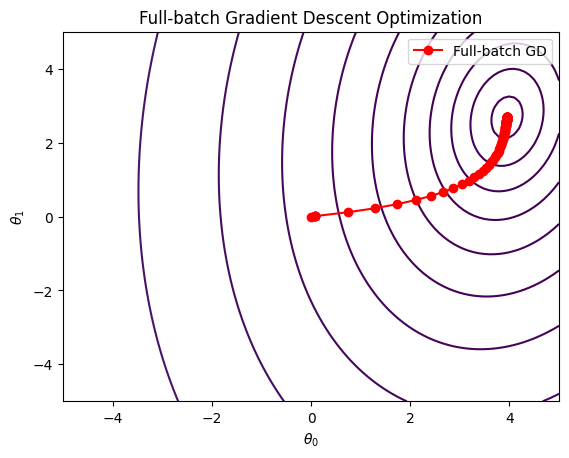

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the model function
def model(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

# Define the loss function
def loss_function(theta_0, theta_1, X, Y):
    predictions = model(theta_0, theta_1, X)
    return np.mean((Y - predictions) ** 2)  # Mean Squared Error (MSE)

# Define the gradient calculation
def gradients(theta_0, theta_1, X, Y):
    predictions = model(theta_0, theta_1, X)
    error = Y - predictions
    grad_0 = -2 * np.mean(error)
    grad_1 = -2 * np.mean(error * X)
    return grad_0, grad_1

# Full-batch Gradient Descent
def full_batch_gd(X, Y, learning_rate, epochs):
    theta_0, theta_1 = 0.0, 0.0  # Initialize parameters
    losses = []
    for epoch in range(epochs):
        grad_theta_0, grad_theta_1 = gradients(theta_0, theta_1, X, Y)
        theta_0 -= learning_rate * grad_theta_0  # Update parameters
        theta_1 -= learning_rate * grad_theta_1
        
        avg_loss = loss_function(theta_0, theta_1, X, Y)
        losses.append(avg_loss)
    return theta_0, theta_1, losses

# Loss surface generation
def loss_surface(theta_0, theta_1, X, Y):
    loss = np.zeros_like(Theta_0)
    for i in range(Theta_0.shape[0]):
        for j in range(Theta_0.shape[1]):
            loss[i, j] = loss_function(Theta_0[i, j], Theta_1[i, j], X, Y)
    return loss

# Loss surface calculation
theta_0_vals = np.linspace(-5, 5, 100)
theta_1_vals = np.linspace(-5, 5, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_vals, theta_1_vals)
Z = loss_surface(Theta_0, Theta_1, x1, y)

# Setup figure
fig, ax = plt.subplots()

# Initial plot
contour = ax.contour(Theta_0, Theta_1, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
line_fb, = ax.plot([], [], 'r-', marker='o', label='Full-batch GD')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Full-batch Gradient Descent Optimization')
ax.legend()

# Lists to store theta values
theta_fb_0_vals = [0.0]  # Full-batch GD trajectory for theta_0
theta_fb_1_vals = [0.0]  # Full-batch GD trajectory for theta_1

# Update the line for animation
def update_full_batch(epoch):
    global theta_fb_0_vals, theta_fb_1_vals
    theta_fb_0, theta_fb_1, _ = full_batch_gd(x1, y, learning_rate, epoch + 1)
    theta_fb_0_vals.append(theta_fb_0)
    theta_fb_1_vals.append(theta_fb_1)
    line_fb.set_data(theta_fb_0_vals, theta_fb_1_vals)
    return line_fb,

# Animation
anim_fb = FuncAnimation(fig, update_full_batch, frames=np.arange(0, epochs, 10), interval=200, blit=True)

# Save the animation as a GIF
anim_fb.save('full_batch_gd.gif', writer='Pillow')

plt.show()


MovieWriter Pillow unavailable; using Pillow instead.


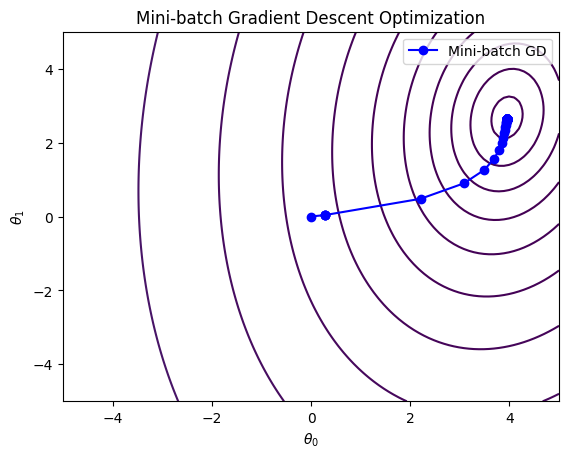

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the model function
def model(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

# Define the loss function
def loss_function(theta_0, theta_1, X, Y):
    predictions = model(theta_0, theta_1, X)
    return np.mean((Y - predictions) ** 2)  # Mean Squared Error (MSE)

# Define gradient calculation
def gradients(theta_0, theta_1, X, Y):
    predictions = model(theta_0, theta_1, X)
    error = Y - predictions
    grad_0 = -2 * np.mean(error)
    grad_1 = -2 * np.mean(error * X)
    return grad_0, grad_1

# Mini-batch Gradient Descent
def mini_batch_gd(X, Y, learning_rate, epochs, batch_size, epsilon):
    theta_0, theta_1 = 0.0, 0.0
    losses_f = []
    for epoch in range(epochs):
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i + batch_size]
            Y_batch = Y[i:i + batch_size]
            grad_theta_0, grad_theta_1 = gradients(theta_0, theta_1, X_batch, Y_batch)
            theta_0 -= learning_rate * grad_theta_0
            theta_1 -= learning_rate * grad_theta_1
            
        avg_loss = loss_function(theta_0, theta_1, X, Y)
        losses_f.append(avg_loss)
        
        # Check for convergence
        if (avg_loss - loss_by_optimal) < epsilon:
            break  # Stop if converged
    return theta_0, theta_1, losses_f

# Loss surface generation
def loss_surface(theta_0, theta_1, X, Y):
    loss = np.zeros_like(Theta_0)
    for i in range(Theta_0.shape[0]):
        for j in range(Theta_0.shape[1]):
            loss[i, j] = loss_function(Theta_0[i, j], Theta_1[i, j], X, Y)
    return loss

# Loss surface calculation
theta_0_vals = np.linspace(-5, 5, 100)
theta_1_vals = np.linspace(-5, 5, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_vals, theta_1_vals)
Z = loss_surface(Theta_0, Theta_1, x1, y)

# Setup figure for Mini-batch Gradient Descent
fig, ax = plt.subplots()

# Initial plot
contour = ax.contour(Theta_0, Theta_1, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
line_mb, = ax.plot([], [], 'b-', marker='o', label='Mini-batch GD')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Mini-batch Gradient Descent Optimization')
ax.legend()

# Lists to store theta values
theta_mb_0_vals = [0.0]  # Mini-batch GD trajectory for theta_0
theta_mb_1_vals = [0.0]  # Mini-batch GD trajectory for theta_1

# Update the line for animation
def update_mini_batch(epoch):
    global theta_mb_0_vals, theta_mb_1_vals
    theta_mb_0, theta_mb_1, _ = mini_batch_gd(x1, y, learning_rate, epoch + 1, batch_size, epsilon)
    theta_mb_0_vals.append(theta_mb_0)
    theta_mb_1_vals.append(theta_mb_1)
    line_mb.set_data(theta_mb_0_vals, theta_mb_1_vals)
    return line_mb,

# Animation
anim_mb = FuncAnimation(fig, update_mini_batch, frames=np.arange(0, epochs, 10), interval=200, blit=True)

# Save the animation as a GIF
anim_mb.save('mini_batch_gd.gif', writer='Pillow')

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


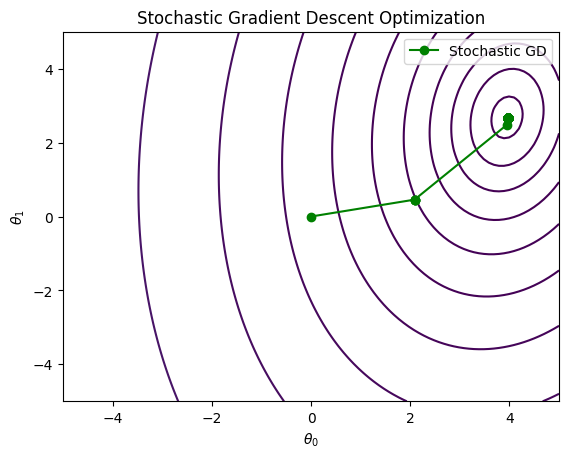

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the model function
def model(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

# Define the loss function
def loss_function(theta_0, theta_1, X, Y):
    predictions = model(theta_0, theta_1, X)
    return np.mean((Y - predictions) ** 2)  # Mean Squared Error (MSE)

# Define gradient calculation
def gradients(theta_0, theta_1, X, Y):
    predictions = model(theta_0, theta_1, X)
    error = Y - predictions
    grad_0 = -2 * np.mean(error)
    grad_1 = -2 * np.mean(error * X)
    return grad_0, grad_1

# Stochastic Gradient Descent
def stochastic_gd(X, Y, learning_rate, epochs, epsilon):
    theta_0, theta_1 = 0.0, 0.0
    losses_f = []
    for epoch in range(epochs):
        for x, y in zip(X, Y):
            grad_theta_0, grad_theta_1 = gradients(theta_0, theta_1, x, y)
            theta_0 -= learning_rate * grad_theta_0
            theta_1 -= learning_rate * grad_theta_1
            
        avg_loss = loss_function(theta_0, theta_1, X, Y)
        losses_f.append(avg_loss)
        
        # Check for convergence
        if (avg_loss - loss_by_optimal) < epsilon:
            break  # Stop if converged
    return theta_0, theta_1, losses_f

# Loss surface generation
def loss_surface(theta_0, theta_1, X, Y):
    loss = np.zeros_like(Theta_0)
    for i in range(Theta_0.shape[0]):
        for j in range(Theta_0.shape[1]):
            loss[i, j] = loss_function(Theta_0[i, j], Theta_1[i, j], X, Y)
    return loss

# Loss surface calculation
theta_0_vals = np.linspace(-5, 5, 100)
theta_1_vals = np.linspace(-5, 5, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_vals, theta_1_vals)
Z = loss_surface(Theta_0, Theta_1, x1, y)

# Setup figure for Stochastic Gradient Descent
fig, ax = plt.subplots()

# Initial plot
contour = ax.contour(Theta_0, Theta_1, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
line_sgd, = ax.plot([], [], 'g-', marker='o', label='Stochastic GD')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Stochastic Gradient Descent Optimization')
ax.legend()

# Lists to store theta values
theta_sgd_0_vals = [0.0]  # Stochastic GD trajectory for theta_0
theta_sgd_1_vals = [0.0]  # Stochastic GD trajectory for theta_1

# Update the line for animation
def update_sgd(epoch):
    global theta_sgd_0_vals, theta_sgd_1_vals
    theta_sgd_0, theta_sgd_1, _ = stochastic_gd(x1, y, learning_rate, epoch + 1, epsilon)
    theta_sgd_0_vals.append(theta_sgd_0)
    theta_sgd_1_vals.append(theta_sgd_1)
    line_sgd.set_data(theta_sgd_0_vals, theta_sgd_1_vals)
    return line_sgd,

# Animation
anim_sgd = FuncAnimation(fig, update_sgd, frames=np.arange(0, epochs, 10), interval=200, blit=True)

# Save the animation as a GIF
anim_sgd.save('stochastic_gd.gif', writer='imagemagick')

plt.show()


### Question 4)Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for both dataset. Choose ϵ = 0.001 Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. 

Epoch 0: Cost = 4.714367182528182
Epoch 10: Cost = 2.3806000782914385
Epoch 20: Cost = 0.9705053885447367
Epoch 30: Cost = 0.6676873172405707
Epoch 40: Cost = 0.47894237614208335
Epoch 50: Cost = 0.3548429463744027
Epoch 60: Cost = 0.31563920162828063
Epoch 70: Cost = 0.3051101180041335
Epoch 80: Cost = 0.3000936144605366
Epoch 90: Cost = 0.29830453202538587
Epoch 100: Cost = 0.2979955982972632
Epoch 110: Cost = 0.2979224303317056
Epoch 120: Cost = 0.2978832981246346
Epoch 130: Cost = 0.29787715502051587
Epoch 140: Cost = 0.29787823184561
Epoch 150: Cost = 0.2978777216150288
Epoch 160: Cost = 0.29787726539828163
Epoch 170: Cost = 0.2978771869096301
Epoch 180: Cost = 0.29787714115842884
Epoch 190: Cost = 0.29787710013304436
Optimal parameters: Slope = 2.682690731149131, Intercept = 3.9507346654581252


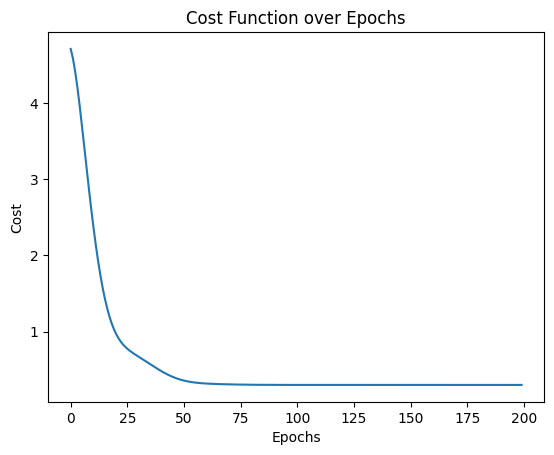

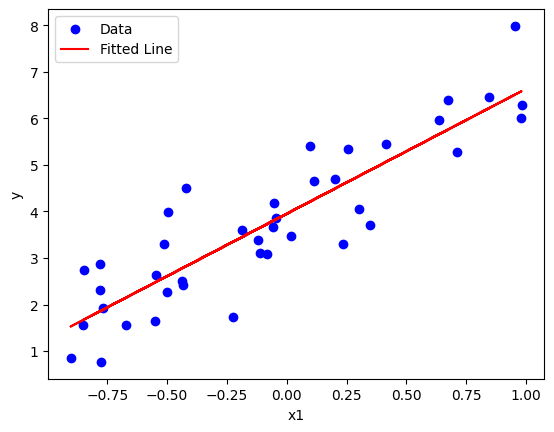

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Adding bias term (intercept) to the feature matrix
X = np.vstack([x1, np.ones(len(x1))]).T  # X = [x1, 1] (where 1 is for the bias term)

# Initialize parameters
theta = np.random.randn(X.shape[1])  # Random initial parameters for slope and intercept
alpha = 0.1  # Learning rate
beta = 0.9   # Momentum factor
epochs = 200  # Number of iterations
m = len(y)  # Number of samples

# Initialize velocity
v = np.zeros_like(theta)

# Hypothesis function (for linear regression)
def predict(X, theta):
    return np.dot(X, theta)

# Cost function (mean squared error)
def cost(X, y, theta):
    predictions = predict(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient of the cost function
def gradient(X, y, theta):
    predictions = predict(X, theta)
    return (1 / m) * np.dot(X.T, (predictions - y))

# Gradient descent with momentum
def gradient_descent_with_momentum(X, y, theta, alpha, beta, epochs):
    v = np.zeros_like(theta)
    costs = []  # To store cost at each iteration for plotting
    
    for epoch in range(epochs):
        grad = gradient(X, y, theta)
        v = beta * v + (1 - beta) * grad
        theta = theta - alpha * v

        # Record the cost for plotting
        current_cost = cost(X, y, theta)
        costs.append(current_cost)

        # Print cost every 10 iterations
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {current_cost}")
    
    return theta, costs

# Running the gradient descent with momentum
optimal_theta, costs = gradient_descent_with_momentum(X, y, theta, alpha, beta, epochs)

# Print the optimal parameters (slope and intercept)
print(f"Optimal parameters: Slope = {optimal_theta[0]}, Intercept = {optimal_theta[1]}")

# Plot the cost vs iterations
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.show()

# Plot the data points and the fitted line
plt.scatter(x1, y, color='blue', label='Data')
plt.plot(x1, predict(X, optimal_theta), color='red', label='Fitted Line')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()


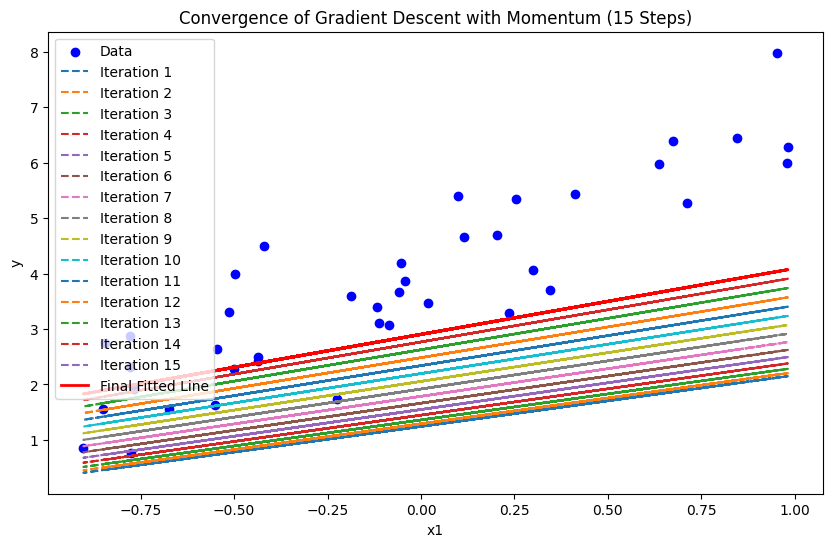

Optimal parameters after 15 steps: Slope = 1.1901398068686586, Intercept = 2.904145271137838


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Adding bias term (intercept) to the feature matrix
X = np.vstack([x1, np.ones(len(x1))]).T  # X = [x1, 1] (where 1 is for the bias term)

# Initialize parameters
theta = np.random.randn(X.shape[1])  # Random initial parameters for slope and intercept
alpha = 0.1  # Learning rate
beta = 0.9   # Momentum factor
epochs = 15  # Convergence visualization for first 15 iterations
m = len(y)  # Number of samples

# Initialize velocity
v = np.zeros_like(theta)

# Hypothesis function (for linear regression)
def predict(X, theta):
    return np.dot(X, theta)

# Gradient of the cost function
def gradient(X, y, theta):
    predictions = predict(X, theta)
    return (1 / m) * np.dot(X.T, (predictions - y))

# Gradient descent with momentum and visualization
def gradient_descent_with_visualization(X, y, theta, alpha, beta, epochs):
    v = np.zeros_like(theta)
    
    # Plot the dataset
    plt.figure(figsize=(10, 6))
    plt.scatter(x1, y, color='blue', label='Data')
    
    for epoch in range(epochs):
        grad = gradient(X, y, theta)
        v = beta * v + (1 - beta) * grad
        theta = theta - alpha * v

        # Plot the current fitted line
        plt.plot(x1, predict(X, theta), label=f'Iteration {epoch + 1}', linestyle='--')
    
    # Plot the final fitted line in red
    plt.plot(x1, predict(X, theta), color='red', label='Final Fitted Line', linewidth=2)

    # Add labels and legend
    plt.xlabel('x1')
    plt.ylabel('y')
    plt.title('Convergence of Gradient Descent with Momentum (15 Steps)')
    plt.legend(loc='best')
    plt.show()

    return theta

# Running the gradient descent with visualization
optimal_theta = gradient_descent_with_visualization(X, y, theta, alpha, beta, epochs)

# Print the final optimal parameters (slope and intercept)
print(f"Optimal parameters after 15 steps: Slope = {optimal_theta[0]}, Intercept = {optimal_theta[1]}")

In [24]:
tolerance = 1e-4
epoch = 0
for i in range(1,len(costs)):
    if abs(costs[i]-costs[i-1])<tolerance:
        epoch = i
        break;

print("Total epochs required to converge : " , epoch)

Total epochs required to converge :  89


For stochastic gradient descent using momentum

Epoch 0: Cost = 0.7214778958203865
Epoch 10: Cost = 0.298236982966606
Epoch 20: Cost = 0.30239278013206994
Epoch 30: Cost = 0.3079879725516561
Epoch 40: Cost = 0.3018121301935899
Epoch 50: Cost = 0.31365744494527814
Epoch 60: Cost = 0.30439768101052095
Epoch 70: Cost = 0.29949150599566404
Epoch 80: Cost = 0.3028489243785186
Epoch 90: Cost = 0.31881131934385015
Epoch 100: Cost = 0.29847152163995094
Epoch 110: Cost = 0.30284799019951025
Epoch 120: Cost = 0.30643173526519807
Epoch 130: Cost = 0.30400511037598205
Epoch 140: Cost = 0.2986783900932007
Epoch 150: Cost = 0.3192344172731991
Epoch 160: Cost = 0.2994222046974233
Epoch 170: Cost = 0.3025198687428905
Epoch 180: Cost = 0.3038375478601867
Epoch 190: Cost = 0.3164327521913714
Optimal parameters: Slope = 2.658724175711015, Intercept = 3.911697692287578


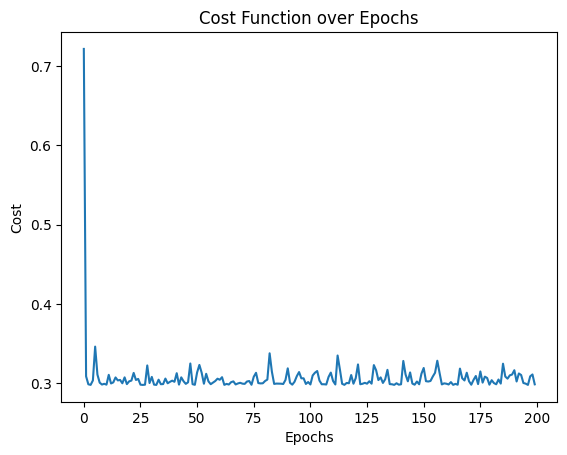

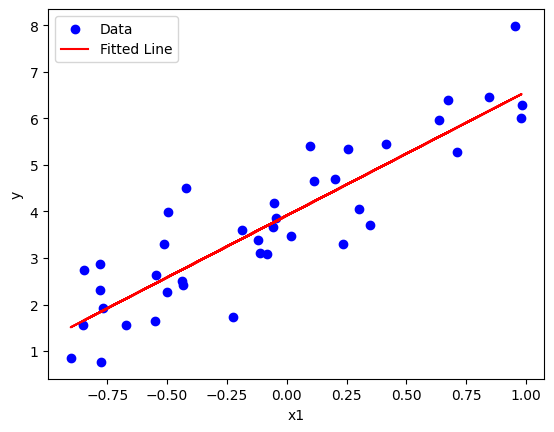

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Adding bias term (intercept) to the feature matrix
X = np.vstack([x1, np.ones(len(x1))]).T  # X = [x1, 1] (where 1 is for the bias term)

# Initialize parameters
theta = np.random.randn(X.shape[1])  # Random initial parameters for slope and intercept
alpha = 0.1  # Learning rate
beta = 0.9   # Momentum factor
epochs = 200  # Number of iterations
m = len(y)  # Number of samples

# Initialize velocity
v = np.zeros_like(theta)

# Hypothesis function (for linear regression)
def predict(X, theta):
    return np.dot(X, theta)

# Cost function (mean squared error)
def cost(X, y, theta):
    predictions = predict(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient of the cost function for a single sample
def gradient_single(X_i, y_i, theta):
    prediction = np.dot(X_i, theta)
    return (prediction - y_i) * X_i

# Stochastic Gradient Descent with Momentum
def sgd_with_momentum(X, y, theta, alpha, beta, epochs):
    v = np.zeros_like(theta)
    costs = []  # To store cost at each iteration for plotting
    
    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch to avoid bias
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(m):
            X_i = X_shuffled[i]  # Feature vector of a single data point
            y_i = y_shuffled[i]  # Corresponding target value
            
            # Compute the gradient for a single sample
            grad = gradient_single(X_i, y_i, theta)
            
            # Update the velocity
            v = beta * v + (1 - beta) * grad
            
            # Update the parameters
            theta = theta - alpha * v

        # Record the cost after each epoch for plotting
        current_cost = cost(X, y, theta)
        costs.append(current_cost)

        # Print cost every 10 iterations
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {current_cost}")
    
    return theta, costs

# Running the stochastic gradient descent with momentum
optimal_theta, costs = sgd_with_momentum(X, y, theta, alpha, beta, epochs)

# Print the optimal parameters (slope and intercept)
print(f"Optimal parameters: Slope = {optimal_theta[0]}, Intercept = {optimal_theta[1]}")

# Plot the cost vs iterations
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.show()

# Plot the data points and the fitted line
plt.scatter(x1, y, color='blue', label='Data')
plt.plot(x1, predict(X, optimal_theta), color='red', label='Fitted Line')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()


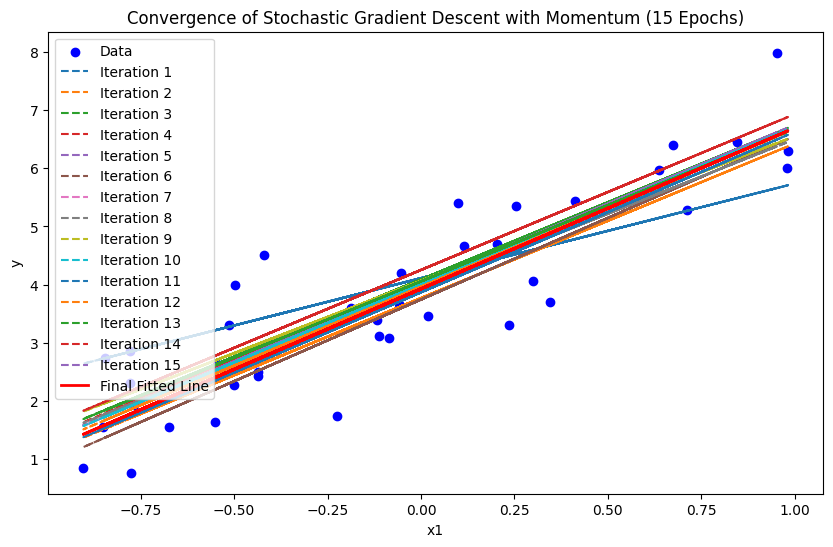

Optimal parameters after 15 steps: Slope = 2.76809584905336, Intercept = 3.927388609992024


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Adding bias term (intercept) to the feature matrix
X = np.vstack([x1, np.ones(len(x1))]).T  # X = [x1, 1] (where 1 is for the bias term)

# Initialize parameters
theta = np.random.randn(X.shape[1])  # Random initial parameters for slope and intercept
alpha = 0.1  # Learning rate
beta = 0.9   # Momentum factor
epochs = 15  # Visualization for first 15 iterations
m = len(y)  # Number of samples

# Initialize velocity
v = np.zeros_like(theta)

# Hypothesis function (for linear regression)
def predict(X, theta):
    return np.dot(X, theta)

# Gradient of the cost function for a single sample
def gradient_single(X_i, y_i, theta):
    prediction = np.dot(X_i, theta)
    return (prediction - y_i) * X_i

# Stochastic Gradient Descent with Momentum and Visualization
def sgd_with_visualization(X, y, theta, alpha, beta, epochs):
    v = np.zeros_like(theta)
    
    # Plot the dataset
    plt.figure(figsize=(10, 6))
    plt.scatter(x1, y, color='blue', label='Data')
    
    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(m):
            X_i = X_shuffled[i]  # Feature vector of a single data point
            y_i = y_shuffled[i]  # Corresponding target value
            
            # Compute the gradient for a single sample
            grad = gradient_single(X_i, y_i, theta)
            
            # Update the velocity
            v = beta * v + (1 - beta) * grad
            
            # Update the parameters
            theta = theta - alpha * v
        
        # Plot the current fitted line after each epoch
        plt.plot(x1, predict(X, theta), label=f'Iteration {epoch + 1}', linestyle='--')
    
    # Plot the final fitted line in red
    plt.plot(x1, predict(X, theta), color='red', label='Final Fitted Line', linewidth=2)

    # Add labels and legend
    plt.xlabel('x1')
    plt.ylabel('y')
    plt.title('Convergence of Stochastic Gradient Descent with Momentum (15 Epochs)')
    plt.legend(loc='best')
    plt.show()

    return theta

# Running the stochastic gradient descent with visualization
optimal_theta = sgd_with_visualization(X, y, theta, alpha, beta, epochs)

# Print the final optimal parameters (slope and intercept)
print(f"Optimal parameters after 15 steps: Slope = {optimal_theta[0]}, Intercept = {optimal_theta[1]}")


In [27]:
tolerance = 1e-4
epoch = 0
for i in range(1,len(costs)):
    if abs(costs[i])<loss_by_optimal:
        epoch = i
        break;

print("Total epochs required to converge : " , epoch)

Total epochs required to converge :  1


Epoch 0: Cost = 3.8366729983856476
Epoch 10: Cost = 1.4939750651969559
Epoch 20: Cost = 0.8570065396348444
Epoch 30: Cost = 0.5885156746129118
Epoch 40: Cost = 0.45295215734870226
Epoch 50: Cost = 0.38111149589902943
Epoch 60: Cost = 0.3426108549418434
Epoch 70: Cost = 0.3219259488046693
Epoch 80: Cost = 0.31080657935760736
Epoch 90: Cost = 0.3048285222951491
Epoch 100: Cost = 0.3016144789416886
Epoch 110: Cost = 0.29988646991048284
Epoch 120: Cost = 0.2989574161178778
Epoch 130: Cost = 0.2984579157179212
Epoch 140: Cost = 0.29818936219854136
Epoch 150: Cost = 0.2980449759401748
Epoch 160: Cost = 0.297967347496805
Epoch 170: Cost = 0.2979256110096044
Epoch 180: Cost = 0.2979031716267122
Epoch 190: Cost = 0.2978911072212393
Optimal parameters (Full Batch): Slope = 2.6752739639394187, Intercept = 3.9498289966723314


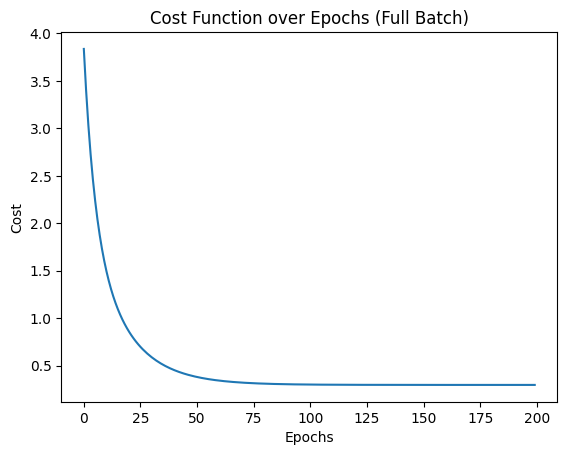

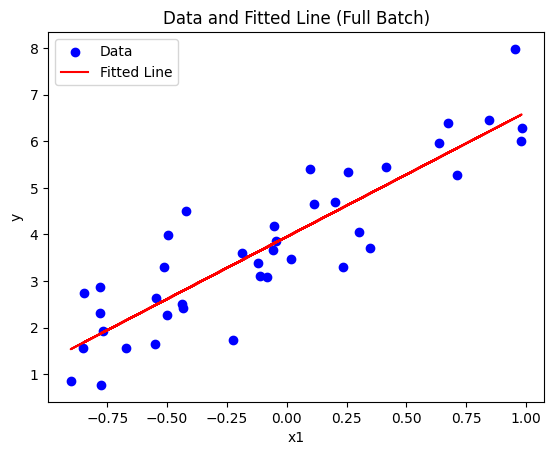

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Adding bias term (intercept) to the feature matrix
X = np.vstack([x1, np.ones(len(x1))]).T  # X = [x1, 1] (where 1 is for the bias term)

# Initialize parameters
theta = np.random.randn(X.shape[1])  # Random initial parameters for slope and intercept
alpha = 0.1  # Learning rate
epochs = 200  # Number of iterations
m = len(y)  # Number of samples

# Hypothesis function (for linear regression)
def predict(X, theta):
    return np.dot(X, theta)

# Cost function (mean squared error)
def cost(X, y, theta):
    predictions = predict(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient of the cost function
def gradient(X, y, theta):
    predictions = predict(X, theta)
    return (1 / m) * np.dot(X.T, (predictions - y))

# Full Batch Gradient Descent
def full_batch_gradient_descent(X, y, theta, alpha, epochs):
    costs = []  # To store cost at each iteration for plotting

    for epoch in range(epochs):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad

        # Record the cost for plotting
        current_cost = cost(X, y, theta)
        costs.append(current_cost)

        # Print cost every 10 iterations
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {current_cost}")

    return theta, costs

# Running the full batch gradient descent
optimal_theta_full_batch, costs_full_batch = full_batch_gradient_descent(X, y, theta, alpha, epochs)

# Print the optimal parameters (slope and intercept) for full batch
print(f"Optimal parameters (Full Batch): Slope = {optimal_theta_full_batch[0]}, Intercept = {optimal_theta_full_batch[1]}")

# Plot the cost vs iterations for full batch
plt.figure()
plt.plot(costs_full_batch)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs (Full Batch)')
plt.show()

# Plot the data points and the fitted line for full batch
plt.figure()
plt.scatter(x1, y, color='blue', label='Data')
plt.plot(x1, predict(X, optimal_theta_full_batch), color='red', label='Fitted Line')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.title('Data and Fitted Line (Full Batch)')
plt.show()


Epoch 0: Cost = 0.4974630806980372
Epoch 10: Cost = 0.318445328527547
Epoch 20: Cost = 0.31844540781694275
Epoch 30: Cost = 0.3184454078171058
Epoch 40: Cost = 0.3184454078171058
Epoch 50: Cost = 0.3184454078171058
Epoch 60: Cost = 0.3184454078171058
Epoch 70: Cost = 0.3184454078171058
Epoch 80: Cost = 0.3184454078171058
Epoch 90: Cost = 0.3184454078171058
Epoch 100: Cost = 0.3184454078171058
Epoch 110: Cost = 0.3184454078171058
Epoch 120: Cost = 0.3184454078171058
Epoch 130: Cost = 0.3184454078171058
Epoch 140: Cost = 0.3184454078171058
Epoch 150: Cost = 0.3184454078171058
Epoch 160: Cost = 0.3184454078171058
Epoch 170: Cost = 0.3184454078171058
Epoch 180: Cost = 0.3184454078171058
Epoch 190: Cost = 0.3184454078171058
Optimal parameters (SGD): Slope = 2.714042016932191, Intercept = 4.155442109085722


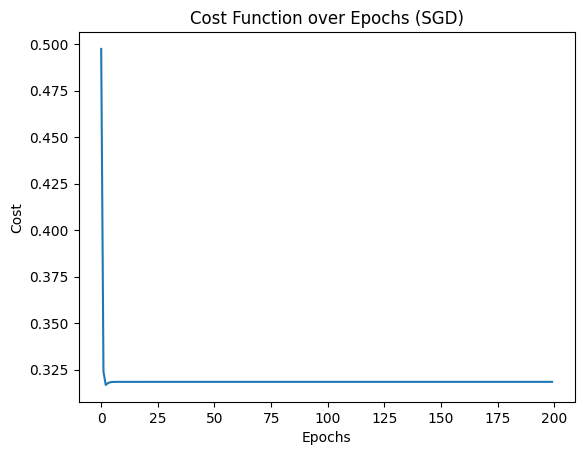

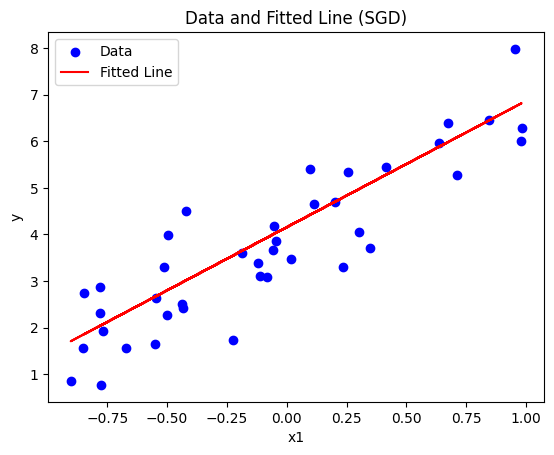

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Adding bias term (intercept) to the feature matrix
X = np.vstack([x1, np.ones(len(x1))]).T  # X = [x1, 1] (where 1 is for the bias term)

# Initialize parameters
theta = np.random.randn(X.shape[1])  # Random initial parameters for slope and intercept
alpha = 0.1  # Learning rate
epochs = 200  # Number of iterations
m = len(y)  # Number of samples

# Hypothesis function (for linear regression)
def predict(X, theta):
    return np.dot(X, theta)

# Cost function (mean squared error)
def cost(X, y, theta):
    predictions = predict(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient of the cost function (for one sample)
def stochastic_gradient(X, y, theta, i):
    predictions = predict(X[i:i+1], theta)
    return np.dot(X[i:i+1].T, (predictions - y[i:i+1]))

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, alpha, epochs):
    costs = []  # To store cost at each iteration for plotting

    for epoch in range(epochs):
        for i in range(m):
            grad = stochastic_gradient(X, y, theta, i)
            theta = theta - alpha * grad
            # Record the cost for plotting
            current_cost = cost(X, y, theta)

        costs.append(current_cost)
        # Print cost every 10 iterations
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {current_cost}")

    return theta, costs

# Running the stochastic gradient descent
optimal_theta_sgd, costs_sgd = stochastic_gradient_descent(X, y, theta, alpha, epochs)

# Print the optimal parameters (slope and intercept) for SGD
print(f"Optimal parameters (SGD): Slope = {optimal_theta_sgd[0]}, Intercept = {optimal_theta_sgd[1]}")

# Plot the cost vs iterations for SGD
plt.figure()
plt.plot(costs_sgd)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs (SGD)')
plt.show()

# Plot the data points and the fitted line for SGD
plt.figure()
plt.scatter(x1, y, color='blue', label='Data')
plt.plot(x1, predict(X, optimal_theta_sgd), color='red', label='Fitted Line')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.title('Data and Fitted Line (SGD)')
plt.show()


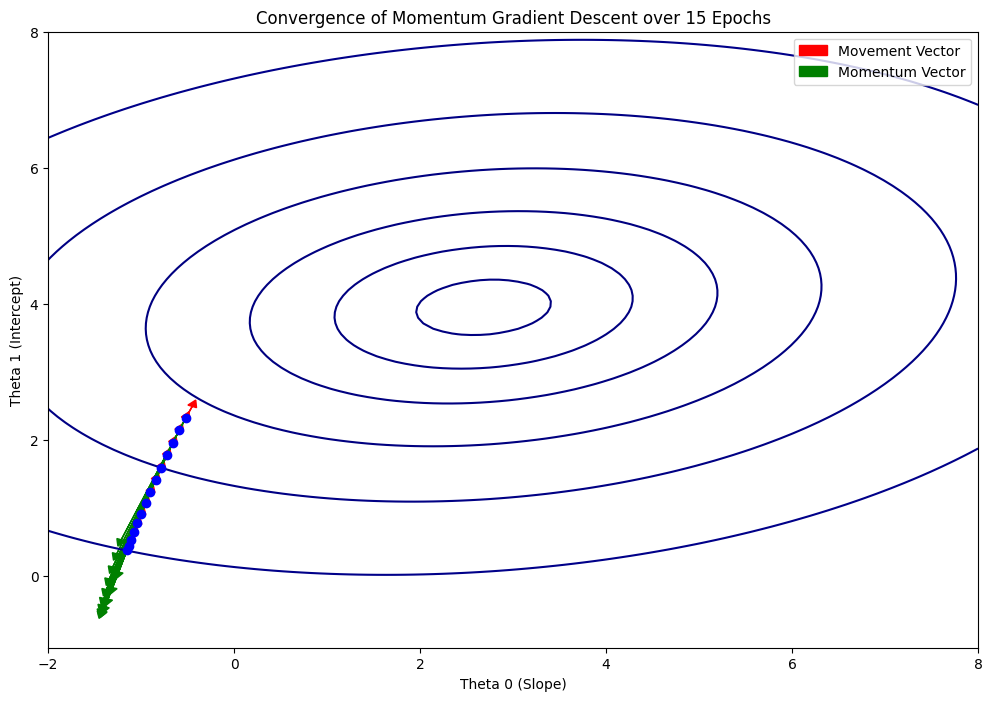

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Adding bias term (intercept) to the feature matrix
X = np.vstack([x1, np.ones(len(x1))]).T  # X = [x1, 1] (where 1 is for the bias term)

# Initialize parameters
alpha = 0.1  # Learning rate
beta = 0.9   # Momentum factor
m = len(y)   # Number of samples
epochs = 15  # Number of iterations for visualization

# Hypothesis function (for linear regression)
def predict(X, theta):
    return np.dot(X, theta)

# Cost function (mean squared error)
def cost(X, y, theta):
    predictions = predict(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient of the cost function
def gradient(X, y, theta):
    predictions = predict(X, theta)
    return (1 / m) * np.dot(X.T, (predictions - y))

# Momentum gradient descent with visualization
def momentum_gradient_descent_with_visualization(X, y, alpha, beta, epochs):
    theta = np.random.randn(X.shape[1])
    v = np.zeros_like(theta)
    
    # For contour plots: We will plot over a range of theta0 and theta1 values
    theta0_vals = np.linspace(-2, 8, 100)
    theta1_vals = np.linspace(0, 8, 100)
    
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            t = np.array([theta0, theta1])
            J_vals[i, j] = cost(X, y, t)
    
    # Plot the cost function contours
    theta_history = []  # To track theta over time
    momentum_history = []  # To track momentum over time

    for epoch in range(epochs):
        grad = gradient(X, y, theta)
        v = beta * v + (1 - beta) * grad
        theta = theta - alpha * v

        theta_history.append(theta.copy())
        momentum_history.append(v.copy())
    
    return theta_history, momentum_history, theta0_vals, theta1_vals, J_vals

# Running the momentum gradient descent with visualization
theta_history, momentum_history, theta0_vals, theta1_vals, J_vals = momentum_gradient_descent_with_visualization(X, y, alpha, beta, epochs)

# Plotting the contour plot and vectors
def plot_contours_and_vectors(theta_history, momentum_history, theta0_vals, theta1_vals, J_vals, epochs):
    plt.figure(figsize=(12, 8))
    
    # Plot the contours of the cost function
    plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-2, 3, 20), cmap='jet')
    plt.xlabel('Theta 0 (Slope)')
    plt.ylabel('Theta 1 (Intercept)')
    plt.title(f'Convergence of Momentum Gradient Descent over {epochs} Epochs')
    
    # Plot the vectors: gradient, momentum, and theta trajectory
    for i in range(epochs - 1):
        theta_current = theta_history[i]
        theta_next = theta_history[i + 1]
        momentum_vec = momentum_history[i]

        # Plot the current theta position
        plt.plot(theta_current[0], theta_current[1], 'bo')
        
        # Plot the movement vector (theta update)
        plt.arrow(theta_current[0], theta_current[1], 
                  theta_next[0] - theta_current[0], 
                  theta_next[1] - theta_current[1], 
                  head_width=0.1, head_length=0.1, fc='red', ec='red', label='Movement Vector' if i == 0 else "")

        # Plot the momentum vector
        plt.arrow(theta_current[0], theta_current[1], 
                  momentum_vec[0], 
                  momentum_vec[1], 
                  head_width=0.1, head_length=0.1, fc='green', ec='green', label='Momentum Vector' if i == 0 else "")
    
    # Add legend
    plt.legend(loc='upper right')
    plt.show()

# Visualizing the convergence process with vectors
plot_contours_and_vectors(theta_history, momentum_history, theta0_vals, theta1_vals, J_vals, epochs)
